In [3]:
import numpy as np
import pandas as pd

file_path = 'boston_housing.csv'
df = pd.read_csv(file_path)

X = df[['zn', 'indus', 'chas', 'nox', 'room', 'age', 'distance', 'rad', 'tax', 'ptratio', 'B', 'lstat']].values
y = df['medv'].values

y = np.nan_to_num(y, nan=np.nanmedian(y))

def train_test_split_custom(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_idx = int(X.shape[0] * (1 - test_size))
    X_train = X[indices[:split_idx]]
    X_test = X[indices[split_idx:]]
    y_train = y[indices[:split_idx]]
    y_test = y[indices[split_idx:]]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_state=42)

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

intercept = beta[0]
coefficients = beta[1:]

y_pred = X_test @ beta

def mean_squared_error_custom(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score_custom(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    y_mean = np.mean(y_true)
    ss_tot = np.sum((y_true - y_mean) ** 2)
    return 1 - (ss_res / ss_tot)

mse = mean_squared_error_custom(y_test, y_pred)
r2 = r2_score_custom(y_test, y_pred)

print('模型系数：', coefficients)
print('模型截距：', intercept)
print('均方误差：', mse)
print('决定系数：', r2)

模型系数： [ 6.28942726e-02 -3.50633020e-02  2.61721463e+00 -7.17965721e+00
  4.17531744e+00  1.37565039e-03 -1.39488819e+00  2.85195394e-01
 -1.90625687e-02 -4.35319814e-01  9.81066621e-03 -5.62427259e-01]
模型截距： 21.73652959838477
均方误差： 23.758790366948336
决定系数： 0.6663185520896434


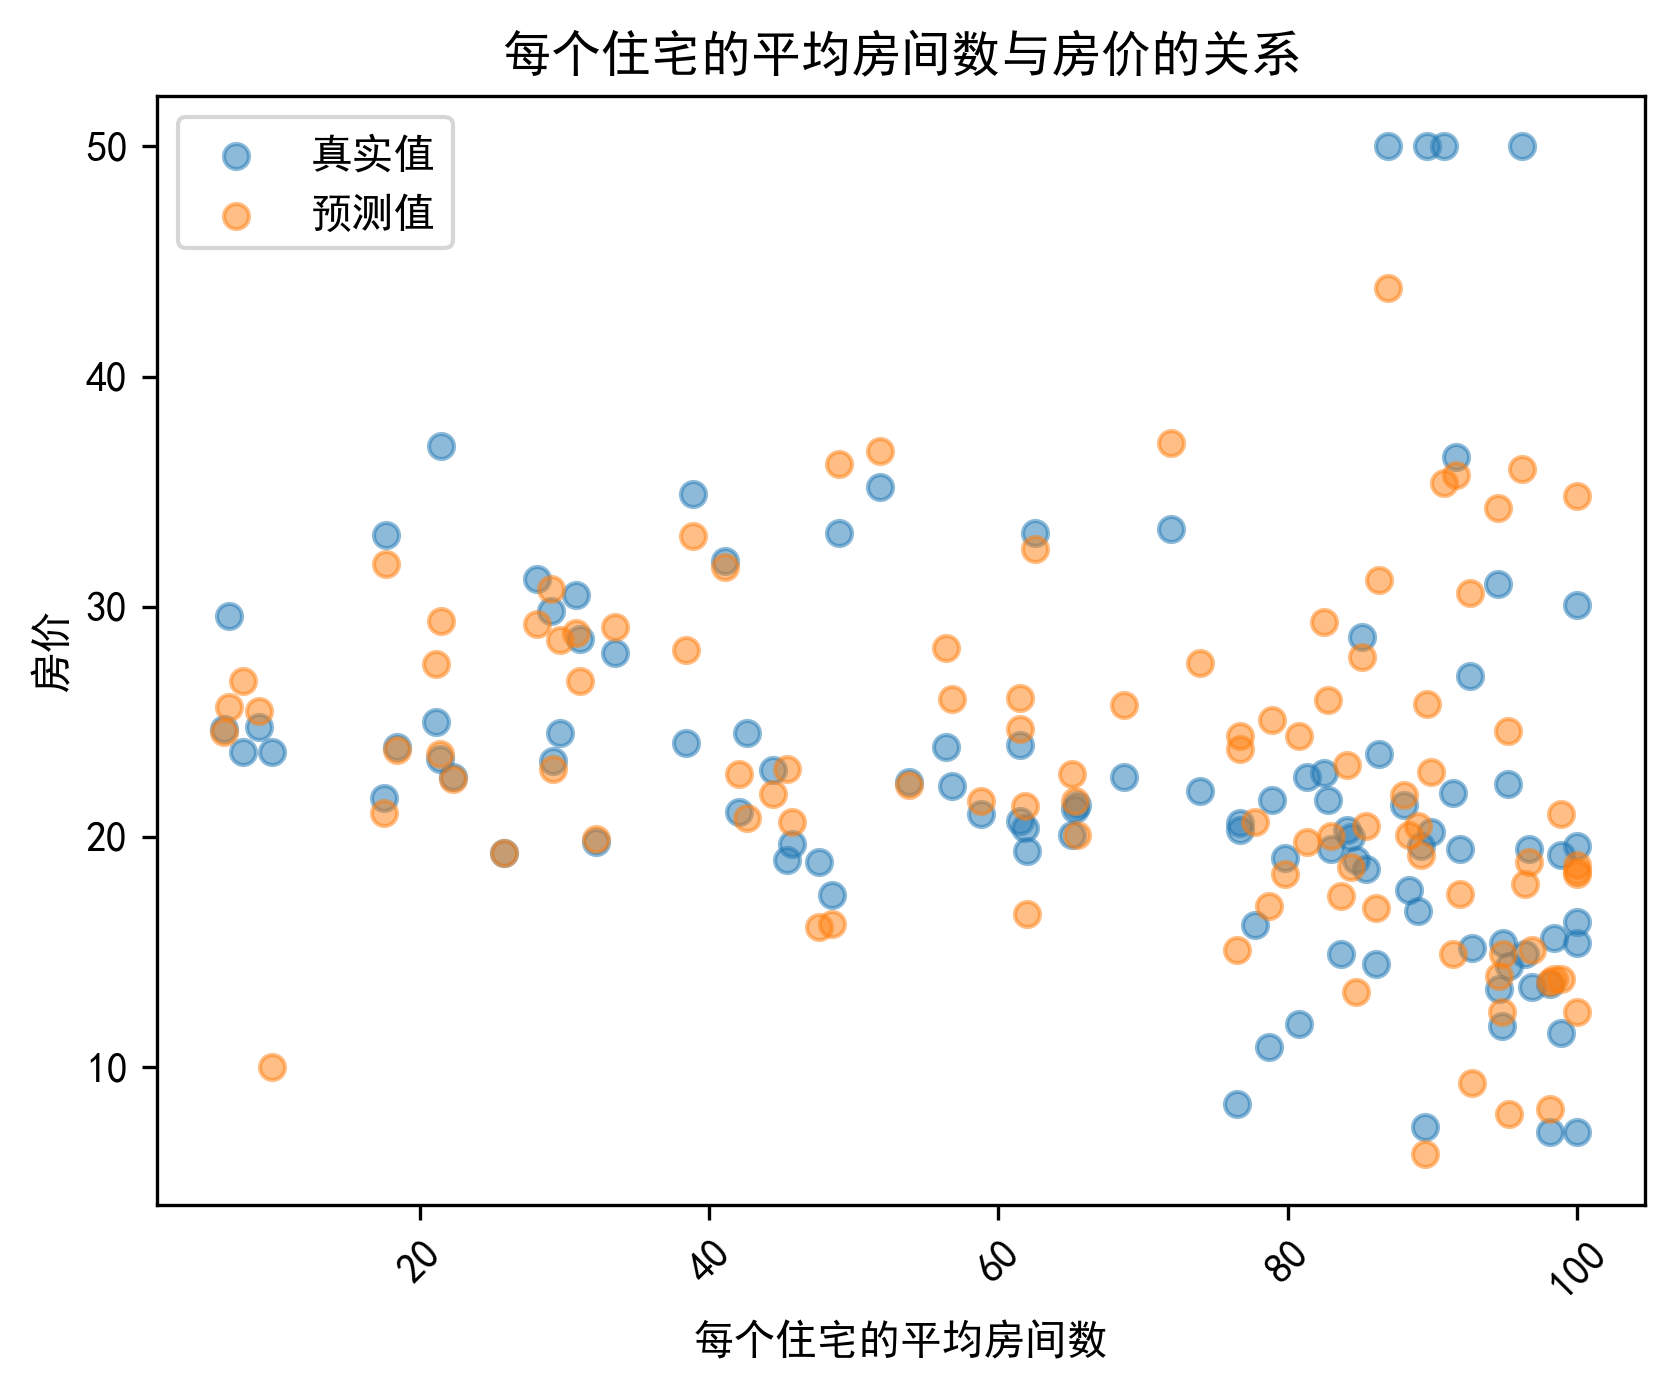

In [5]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

x_test_room = X_test[:, df.columns.get_loc('room') + 1]

plt.scatter(x_test_room, y_test, label='真实值', alpha=0.5)
plt.scatter(x_test_room, y_pred, label='预测值', alpha=0.5)

plt.title('每个住宅的平均房间数与房价的关系')
plt.xlabel('每个住宅的平均房间数')
plt.xticks(rotation=45)
plt.ylabel('房价')
plt.legend()
plt.show()

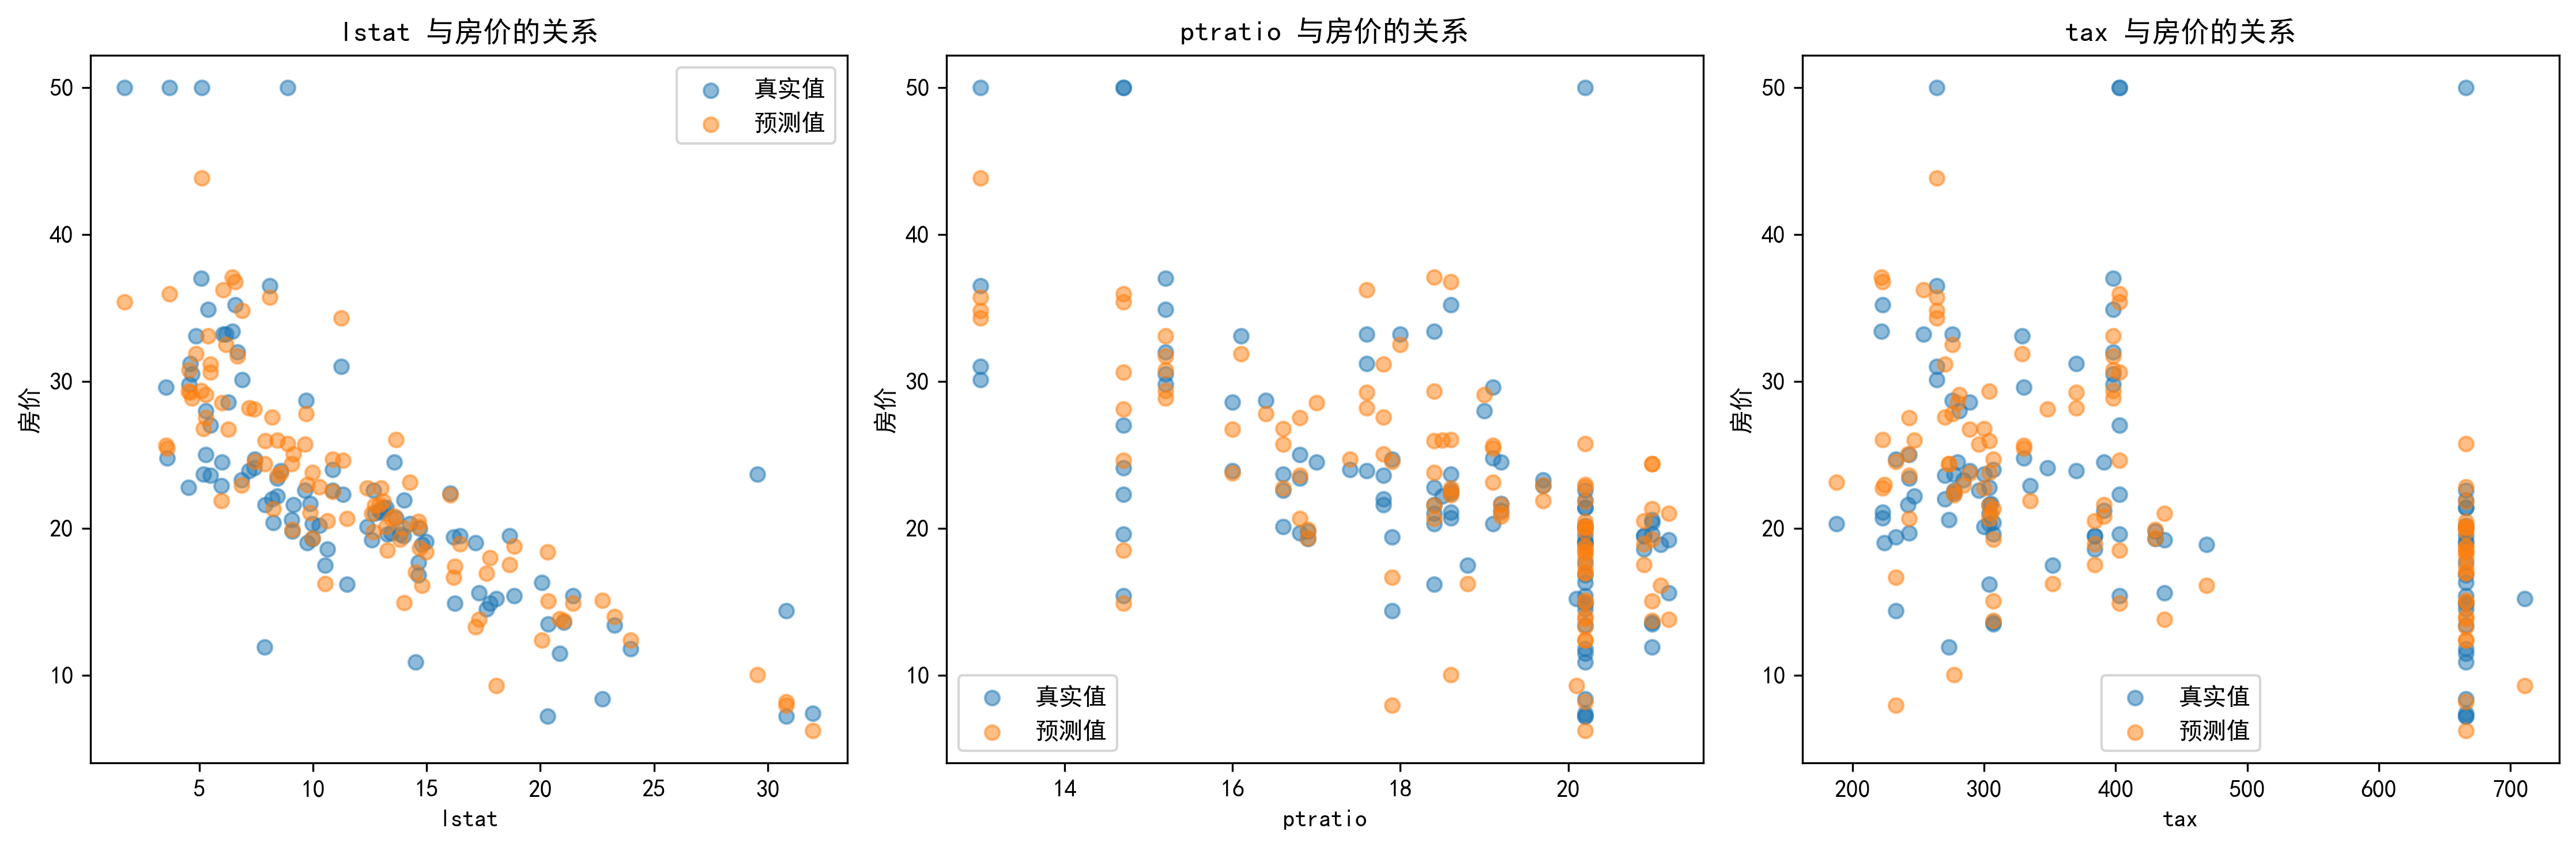

In [6]:
# 定义要绘制的特征列表
features = ['lstat', 'ptratio', 'tax']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(features):
    x_test_feature = X_test[:, df.columns.get_loc(feature)]
    axes[i].scatter(x_test_feature, y_test, label='真实值', alpha=0.5)
    axes[i].scatter(x_test_feature, y_pred, label='预测值', alpha=0.5)
    axes[i].set_title(f'{feature} 与房价的关系')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('房价')
    axes[i].legend()

plt.tight_layout()
plt.show()